# Глава 2. Частотное представление

Выполнил студент группы ИКТ-11М

Елецких Евгений

## Быстрое преобразование Фурье (БПФ или FFT) в Python

Давайте посмотрим на следующий Python-код и работу функции `np.fft.fft()` из библиотеки `Numpy`. Рекомендуется использовать консоль или полноценную IDE при работе с Python кодом, но в крайнем случае вы можете использовать [онлайн-консоль Python](https://trinket.io/embed/python3)

Сперва необходимо сгенерировать сигнал во временной области. Вставьте код ниже в свою консоль/IDE. Нижеследующий код генерирует синусоиду на интервале времени [0 1] с частотой, которую вы можете регулировать с помощью ползунка.

In [1]:
import import_ipynb

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")



# слайдер
my_slider = widgets.FloatSlider(
    value = 1,
    min   = 0.1,
    max   = 5,
    step  = 0.1,
    description = 'Freq, Hz:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = '.1f'
)

# функция генерирует синусоиду на интервале времени [0 1]
# N - количество отсчетов
# freq_Hz - частота синусоиды в Гц
# doPlot - отрисовывать график или нет
def create_sine(N, freq_Hz, doPlot):    
    t = np.arange(0, 1+1/N, 1/N)
    s = np.sin(freq_Hz*2*np.pi*t)
    if doPlot > 0 :
        plt.figure(1)
        plt.plot(t,s,'.-')
        plt.title('s(t,f) = sin(2$\pi$ft)')
        plt.xlabel('Время t, с')
        plt.ylabel('Амплитуда сигнала')
        plt.grid('on')
   
    
wid1 = interact(create_sine, N = fixed(500), freq_Hz = my_slider, doPlot = fixed(True))

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Freq, Hz:', max=5.0, min=0.…

Поскольку для дальнейшего описания принципа работы БПФ в Python использование ползунка сделает код громоздким и неудобным для чтения и понимания, пересоздадим синусоиду с фиксированной частотой 0,15 Гц и затем применим к ней БПФ-функцию `np.fft.fft()` из библиотеки `Numpy`

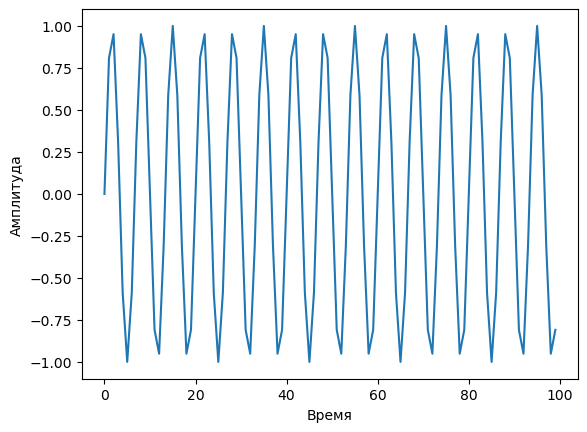

In [2]:
t = np.arange(100)
freq_Hz = 0.15
s = np.sin(freq_Hz*2*np.pi*t)

plt.plot(t,s)
plt.xlabel('Время'), plt.ylabel('Амплитуда')

S = np.fft.fft(s)

Если мы выведем несколько первых значений перенной `S`, то увидим, что она является комплексной переменной:

In [3]:
print('S =', S[1:6])

S = [-1.55941444e-15-2.44249065e-15j  1.46492774e-14+2.90199510e-15j
 -1.77131595e-14+3.66373598e-15j  7.15901218e-15-7.90410510e-17j
 -5.36670238e-16+0.00000000e+00j]


__Подсказка:__ независимо от того, какое задание вы выполняете, если вы когда-нибудь столкнетесь с комплексными числами, попробуйте вычислить их амплитуду и фазу и посмотреть, насколько информативнее становится такой представление. 

Попробуем разложить переменную `S` на амплитудную и фазовую составляющие и построить их графики. В большинстве языков программирования функция `abs()` вычисляет амплитуду комплексного числа. Для вычисления фазы в разных языках используются разные функции, в Python это делает функция `np.angle()`.

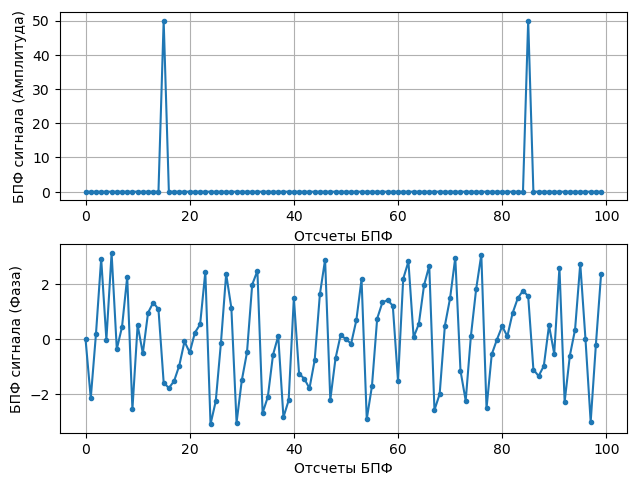

In [4]:
S_mag = np.abs(S)
S_phase = np.angle(S)


fig, [ax1, ax2] = plt.subplots(2,1)
fig.tight_layout() # чтобы графики не накладывались друг на друга

ax1.plot(t,S_mag,'.-')
ax1.set_xlabel('Отсчеты БПФ')
ax1.set_ylabel('БПФ сигнала (Амплитуда)')
ax1.grid('on')

ax2.plot(t,S_phase,'.-')
ax2.set_xlabel('Отсчеты БПФ')
ax2.set_ylabel('БПФ сигнала (Фаза)')
ax2.grid('on')

plt.show()

На данном этапе ось ОХ представляет из себя просто порядковые номера элементов массива `S` (считая от 0). По математическим причинам вывод БПФ имеет следующий формат:

![Рисунок 1](img/1.PNG)

Но мы хотим, чтобы в центре оси ОХ располагалась частота 0 Гц (DC) и слева от нее были отображены отрицательные значения частот (именно такую визуализацию мы хотим получить). Поэтому каждый раз, когда мы выполняем БПФ, нам необходимо выполнять "сдвиг БПФ", который представляет собой простую операцию перестановки массива , что-то вроде циклического сдвига, но больше похож на "положим вот это сюда, а вон то - туда". Рисунок ниже поясняет принцип работы сдвига БПФ:

![Рисунок 2](img/2.PNG)

Для нашего удобства в Numpy есть функция сдвига БПФ, `np.fft.fftshift()`:

In [5]:
S = np.fft.fftshift(np.fft.fft(s))

Также нам необходимо выяснить, какие значения должны быть отображены на оси ОХ. Напомним, что для простоты вычислений использовалась частота дискретизации, равная 1 Гц. Это означает, что левый край частотной области будет равен -0,5 Гц, а правый край будет равен 0,5 Гц. Если сейчас эти манипуляции вам кажутся бессмысленными, после прочтения главы ["IQ семплирование"](https://pysdr.org/content/sampling.html) вы поймете, для чего это было нужно. Пока что будем придерживаться предположения, что частота дискретизации составляла 1 Гц и построим графики амплитуды и фазы выходного сигнала БПФ с соответствующими подписями на оси ОХ:

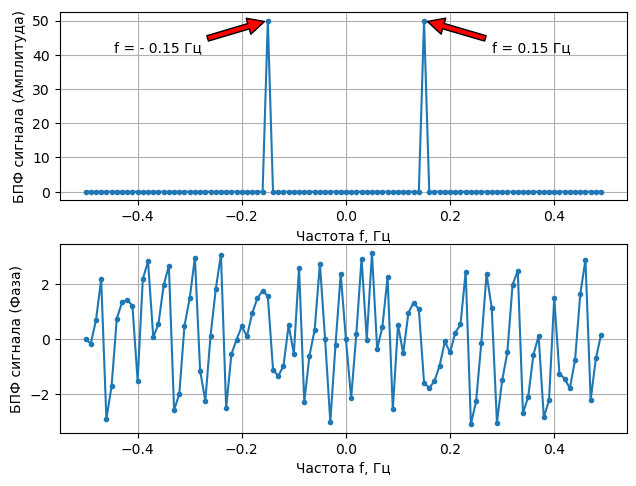

In [6]:
Fs = 1 # частота дискретизации, Гц
N = 100 # количество отсчетов для симуляции и длина нашего FFT

t = np.arange(N) # потому что частота дискретизации равна 1 Гц
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)

fig, [ax1, ax2] = plt.subplots(2,1)
fig.tight_layout() # чтобы графики не накладывались друг на друга

ax1.plot(f,S_mag,'.-')
ax1.set_xlabel('Частота f, Гц')
ax1.set_ylabel('БПФ сигнала (Амплитуда)')
ax1.grid(True)

# рисуем стрелку
ax1.annotate('f = - 0.15 Гц',
             xy = (-0.15,50), 
             xycoords = 'data',
             xytext = (0.25, 0.85), # смещение окончания подписи происходит в долях от всего рисунка, т.е. 0,5 - середина соответствующей оси
             textcoords = 'axes fraction',
             arrowprops = dict(facecolor='red', shrink = 0.05),
             horizontalalignment = 'right', 
             verticalalignment = 'top'
            )

ax1.annotate('f = 0.15 Гц',
             xy = (0.15,50), 
             xycoords = 'data',
             xytext = (0.9, 0.85), # смещение окончания подписи происходит в долях от всего рисунка, т.е. 0,5 - середина соответствующей оси
             textcoords = 'axes fraction',
             arrowprops = dict(facecolor='red', shrink = 0.05),
             horizontalalignment = 'right', 
             verticalalignment = 'top'
            )

ax2.plot(f,S_phase,'.-')
ax2.set_xlabel('Частота f, Гц')
ax2.set_ylabel('БПФ сигнала (Фаза)')
ax2.grid(True)


Обратите внимание, что на верхнем графике мы видим пик на частоте 0,15 Гц, которую мы использовали при создании синусоиды. Значит, наше БПФ сработало! Если бы мы не знали, как генерировалась входная синусоида, а вместо этого просто получили бы набор выборок входного сигнала, мы могли бы использовать БПФ для определения частоты. Причина, по которой мы видим всплеск также на частоте -0,15 Гц, связана с тем фактом, что это был действительный сигнал, а не комплексный, и мы углубимся в это позже.

## Оконные функции

Когда мы используем БПФ для измерения частотных составляющих нашего сигнала, БПФ предполагает, что ему дается часть периодического сигнала. Он ведет себя так, как если бы фрагмент сигнала, который мы получили, продолжает повторяться бесконечно. Как будто последний полученный отсчет соединяется с первым отсчетом. Такой подход вытекает из теории преобразования Фурье. Это означает, что мы хотим избежать резких перепадов значения первой и последней выборки, потому что резкие перепады во временной области приводят к "растеканию" спектра сигнала, и на самом деле наша последняя выборка фактически не связана с нашей первой выборкой. Проще говоря: если мы выполняем БПФ из 100 отсчетов, используя `np.fft.fft(x)`, мы хотим, чтобы `x[0]` и `x[99]` были равны или близки по значению.

Избежать растеканий спектра помогает использование [оконных функций](https://en.wikipedia.org/wiki/Window_function). Прямо перед БПФ мы умножаем отсчет сигнала на оконную функцию, которая представляет собой любую функцию, которая сходится к нулю в обе стороны. Это гарантирует, что срез сигнала будет начинаться и заканчиваться в нуле и соединяться. Наиболее известными оконными функциями являются окна Хэмминга, Ханнинга, Блекмана и Кайзера. Отсутствие окон можно интерпретировать как умножение отсчета на единицу, что соответствует прямоугольному окну (также известному как окно Дирихле). Ниже представлены некоторые оконные функции:

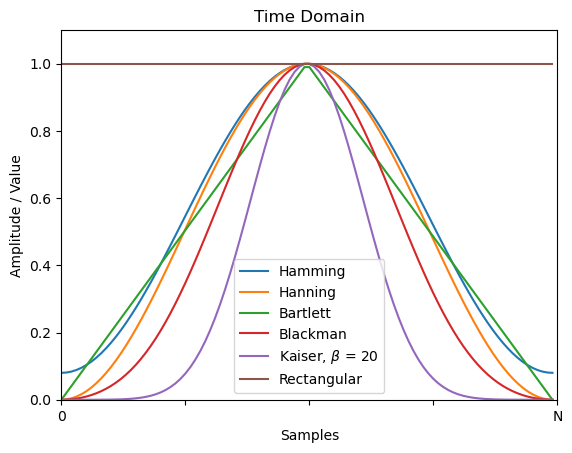

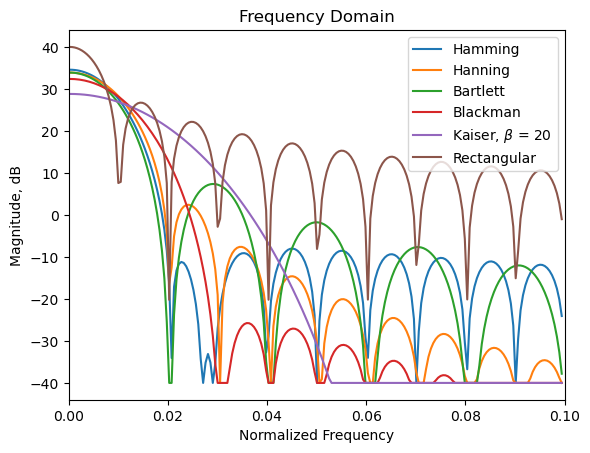

In [7]:
### Временное представление ###
t = np.arange(100)
td1 = np.hamming (100)
td2 = np.hanning (100)
td3 = np.bartlett (100)
td4 = np.blackman(100)
td5 = np.kaiser  (100,20)
td6 = 1+0*t # прямоугольное окно
td = [td1, td2, td3, td4, td5, td6]

legend = ['Hamming', 'Hanning', 'Bartlett', 'Blackman', r'Kaiser, $\beta$ = 20', 'Rectangular']

plt.figure(0)
for i in td:
    plt.plot (t, i)

plt.xlim(0,100)
plt.ylim(0,1.1)

plt.ylabel('Amplitude / Value')
plt.xlabel('Samples')
plt.title('Time Domain')

# подписи к оси ОХ
xticks = ["0", "", "", "","N"]
plt.xticks([0,25, 50, 75, 100], xticks)

plt.legend(legend)



### Частотное представление ###
plt.figure(1)

for i in td:
    fd = np.fft.fft(i,2048)
    fd = np.fft.fftshift(fd)
    f = np.linspace(-0.5,0.5, len(fd))

    response = 20*np.log10(fd)
    response = np.clip(response, -40, 100)

    # здесь мы выбираем промежуток [0 0.1]
    f = f[int(np.ceil(len(f)/2)) : int(len(f))]
    f = f[0 : int(len(f)/5)]
    response = response[int(np.ceil(len(response)/2)) : int(len(response))]
    response = response[0 : int(len(response)/5)]

    plt.plot(f,response)

plt.xlim(0,0.1)
plt.legend(legend)

plt.ylabel('Magnitude, dB')
plt.xlabel('Normalized Frequency')
plt.title('Frequency Domain');

Новичкам в преобразованиях Фурье проще всего использовать окно Хэмминга `np.hamming(N)`, где `N` - количество элементов в массиве, равное длине вашего БПФ. Т.о. в приведенном выше примере перед БПФ нам надо было бы умножить полученный сигнал на оконную функцию:
```python
s = s * np.hamming(100)
```

In [8]:
Fs = 1 # частота дискретизации, Гц
N = 100 # количество отсчетов для симуляции и длина нашего FFT

t = np.arange(N) # потому что частота дискретизации равна 1 Гц
s = np.sin(0.15*2*np.pi*t) + 0.5*np.random.randn(N) # сигнал с шумом

window = widgets.Dropdown(
    options=[("Hamming", 1), ("Hanning", 2), ("Bartlett", 3), ("Blackman", 4), ("Kaiser", 5), ("Rectangular", 6),],
    value=1,
    description="Окно:",
    disabled=False
)

def draw(signal, win, win_len, Fs):
    w = np.zeros(win_len)
    if win == 1:
        w = np.hamming(win_len)
    elif win == 2:
        w = np.hanning(win_len)
    elif win == 3:
        w = np.bartlett(win_len)
    elif win == 4:
        w = np.blackman(win_len)
    elif win == 5:
        w = np.kaiser(win_len,20)
    else:
        w = np.ones(win_len)
    signal = signal * w
    S = np.fft.fftshift(np.fft.fft(signal))
    S_mag = np.abs(S)
    S_phase = np.angle(S)
    f = np.arange(Fs/-2, Fs/2, Fs/N)
    fig, [ax1, ax2] = plt.subplots(2,1)
    fig.tight_layout() # чтобы графики не накладывались друг на друга
    ax1.plot(f,S_mag,'.-')
    ax1.set_xlabel('Частота f, Гц')
    ax1.set_ylabel('БПФ сигнала (Амплитуда)')
    ax1.grid(True)
    ax2.plot(f,S_phase,'.-')
    ax2.set_xlabel('Частота f, Гц')
    ax2.set_ylabel('БПФ сигнала (Фаза)')
    ax2.grid(True)
    
    

wid2 = interact(draw, signal = fixed(s), win = window, win_len = fixed(N), Fs = fixed(Fs))

interactive(children=(Dropdown(description='Окно:', options=(('Hamming', 1), ('Hanning', 2), ('Bartlett', 3), …

Если вы переживаете, что выберете неподходящую оконную функцию, то не бойтесь. Как видно из графиков выше, разница между оконными функциями практически несущественна, поскольку все они сходятся к нулю с обеих сторон.

## БПФ масштабирование

Последнее, на что следует обратить внимание, — длина БПФ. Наилучшая длина БПФ всегда равна порядку двойки (2, 4, 8, 16, ...) из-за способа реализации БПФ. Вы можете задать любую другую длина, но это замедлит вычисления. Обычные длины составляют от 128 до 4096. На практике нам, возможно, придется обрабатывать сигналы длиной в миллионы или миллиарды отсчетов, поэтому нам нужно разбить сигнал и выполнить много БПФ. Это означает, что мы получим много результатов. Мы можем либо усреднить их, либо построить их во временном представлении (особенно, когда наш сигнал меняется со временем). Вам не нужно подвергать каждую выборку сигнала БПФ, чтобы получить хорошее представление этого сигнала в частотной области. Например, вы можете брать длину БПФ равной 1024 на каждые 100 000 отсчетов в сигнале, и он все равно, скорее всего, будет выглядеть нормально.

## Спектрограмма / Водопадное представление спектра

Спектрограмма - это графическое представление зависимости частоты от времени. Это просто набор БПФ, сложенных вместе (по вертикали, если вам нужна частота на горизонтальной оси). Представление такой зависимости в режиме реального времени называется водопадным представлением спектра. Анализатор спектра — это часть оборудования, которая показывает эту спектрограмму/водопад. Вот пример спектрограммы с частотами, отложенными на оси ОХ и временем - на оси ОУ. Синий цвет обозначает самую низкую энергию, а красный — самую высокую. Мы видим сильный всплеск на постоянном токе (0 Гц) в центре с меняющимся сигналом вокруг него. Синий представляет наш уровень шума.

![Рисунок 3](img/3.PNG)

В качестве упражнения попробуем написать код Python, необходимый для создания спектрограммы. Для простоты мы можем ввести реальный сигнал и просто отбросить отрицательную половину частот перед построением спектрограммы. 

В качестве сигнала возьмем обычную синусоиду с добавлением белого шума:

In [80]:
sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone



# кнопки
wtrfl_freq = widgets.ToggleButtons(
    options=[('1 Гц', 1),  ('10 Гц', 10),  ('100 Гц', 100 ), 
             ('1 кГц', 1e3), ('10 кГц', 1e4), ('100 кГц', 1e5),
             ('1 МГц', 1e6), ('10 МГц', 1e7), ('100 МГц', 1e8),
             ('1 ГГц', 1e9)],
    value = 1e5,
    description='Частота:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast']
)

# слайдер шум
wtrfl_noise = widgets.FloatSlider(
    value = 0,
    min   = 0.0,
    max   = 0.5,
    step  = 0.01,
    description = 'Шум:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = '.2f'
)

# слайдер длина БПФ
wtrfl_fftlength = widgets.SelectionSlider(
    options = [('8', 8), 
               ('16', 16), 
               ('32', 32),
               ('64', 64),
               ('128', 128), 
               ('256', 256), 
               ('512', 512), 
               ('1024', 1024), 
               ('2048', 2048), 
               ('4096', 4096)],
    value = 512,
    description = 'Длина БПФ:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True
)

def signal(freq, noise_lvl, fft_size):    
    sample_rate = 10*freq      
    t = np.arange(1024*1000)/sample_rate # 1000 точек для измерения
    x = np.sin(2*np.pi*freq*t) + noise_lvl*np.random.randn(len(t))
    
    #fft_size = 1024
        
    num_rows = int(np.floor(len(x)/fft_size))
        
    spectrogram = np.zeros((num_rows, fft_size))
    
    for i in range(num_rows):
        # цвет соответствующего элемента матрицы определяется величиной 
        # спектральной плотности мощности сигнала, посчитанной в дБ
        spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)
   
    spectrogram = spectrogram[:,fft_size//2:] # достаем только ту часть, которая соответствует частотам больше 0
    
    fig, ax = plt.subplots(1)
    
    if freq <= 100 :
        ax.set_xlabel("Частота [Гц]")    
        ax.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2, 0, len(x)/sample_rate])
    elif freq <= 100e3 :
        ax.set_xlabel("Частота [кГц]")   
        ax.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2/1e3, 0, len(x)/sample_rate]) 
    elif freq <= 100e6 :
        ax.set_xlabel("Частота [МГц]")
        ax.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2/1e6, 0, len(x)/sample_rate]) 
    else:
        ax.set_xlabel("Частота [ГГц]")
        ax.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2/1e9, 0, len(x)/sample_rate]) 
    
    ax.set_ylabel("Время [с]")
    ax.set_title(r"Спектрограмма сигнала s(t) = sin(2$\pi$ft) + n(t)")
## \signal
    
freq = interact(signal, freq = wtrfl_freq, noise_lvl = wtrfl_noise, fft_size = wtrfl_fftlength)

interactive(children=(ToggleButtons(description='Частота:', index=5, options=(('1 Гц', 1), ('10 Гц', 10), ('10…